In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/ASUS/Desktop/Note_books/summer-products-with-rating-and-performance_2020-08.csv")

In [3]:
df.head(4)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.0,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.0,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08


# Data Cleaning

Let's see how many null values are there

In [4]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [5]:
df["rating_five_count"] = df["rating_five_count"].fillna(round(df["rating_five_count"].mean(),2))
df["rating_four_count"] = df["rating_four_count"].fillna(round(df["rating_four_count"].mean(),2))
df["rating_three_count"] = df["rating_three_count"].fillna(round(df["rating_three_count"].mean(),2))
df["rating_two_count"] = df["rating_two_count"].fillna(round(df["rating_two_count"].mean(),2))
df["rating_one_count"] = df["rating_one_count"].fillna(round(df["rating_one_count"].mean(),2))

In [6]:
df["product_color"].value_counts()

black                 302
white                 254
yellow                105
blue                   99
pink                   99
                     ... 
RED                     1
darkgreen               1
lightpurple             1
offblack                1
greysnakeskinprint      1
Name: product_color, Length: 101, dtype: int64

In [7]:
df["product_color"] = df["product_color"].fillna("black")

In [8]:
df["product_variation_size_id"].value_counts()

S          641
XS         356
M          200
XXS        100
L           49
          ... 
30 cm        1
4            1
White        1
2            1
Size--S      1
Name: product_variation_size_id, Length: 106, dtype: int64

In [9]:
df["product_variation_size_id"] = df["product_variation_size_id"].fillna("S")

# Noemalization

In [10]:
df_copy=df.copy()

In [11]:
df_copy["rating"].describe()

count    1573.000000
mean        3.820896
std         0.515374
min         1.000000
25%         3.550000
50%         3.850000
75%         4.110000
max         5.000000
Name: rating, dtype: float64

In rating coloumn difference between max and mean is very small. So we don't want to naormalize the rating coloumn.

In [12]:
df_copy["rating_count"].describe()

count     1573.000000
mean       889.659250
std       1983.928834
min          0.000000
25%         24.000000
50%        150.000000
75%        855.000000
max      20744.000000
Name: rating_count, dtype: float64

In [13]:
df_copy["rating_five_count"].describe()

count     1573.000000
mean       442.263636
std        966.071776
min          0.000000
25%         13.000000
50%         86.000000
75%        442.260000
max      11548.000000
Name: rating_five_count, dtype: float64

In [14]:
df_copy["rating_four_count"].describe()

count    1573.000000
mean      179.599491
std       394.742028
min         0.000000
25%         5.000000
50%        35.000000
75%       179.600000
max      4152.000000
Name: rating_four_count, dtype: float64

In [15]:
df_copy["rating_three_count"].describe()

count    1573.000000
mean      134.549746
std       307.197043
min         0.000000
25%         4.000000
50%        26.000000
75%       134.550000
max      3658.000000
Name: rating_three_count, dtype: float64

In [16]:
df_copy["rating_two_count"].describe()

count    1573.000000
mean       63.711348
std       149.162023
min         0.000000
25%         2.000000
50%        12.000000
75%        63.710000
max      2003.000000
Name: rating_two_count, dtype: float64

In [17]:
df_copy["rating_one_count"].describe()

count    1573.000000
mean       95.735728
std       210.989239
min         0.000000
25%         4.000000
50%        22.000000
75%        95.740000
max      2789.000000
Name: rating_one_count, dtype: float64

We can see above coloumns there is very large difference between max and mean . So we want to naormalize the those coloumn.

# Visualization

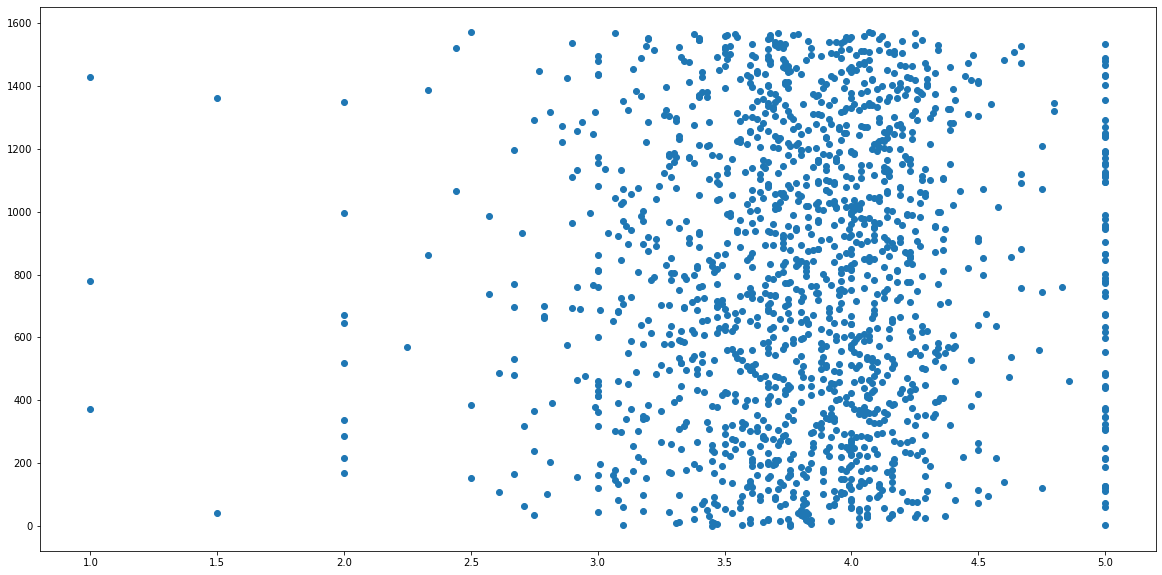

In [18]:
plt.figure(figsize=(20,10))
plt.scatter(df_copy["rating"],df_copy.index)
plt.show()

From this graph we can see there are lot of 3 to 4.5 rated organizations. 

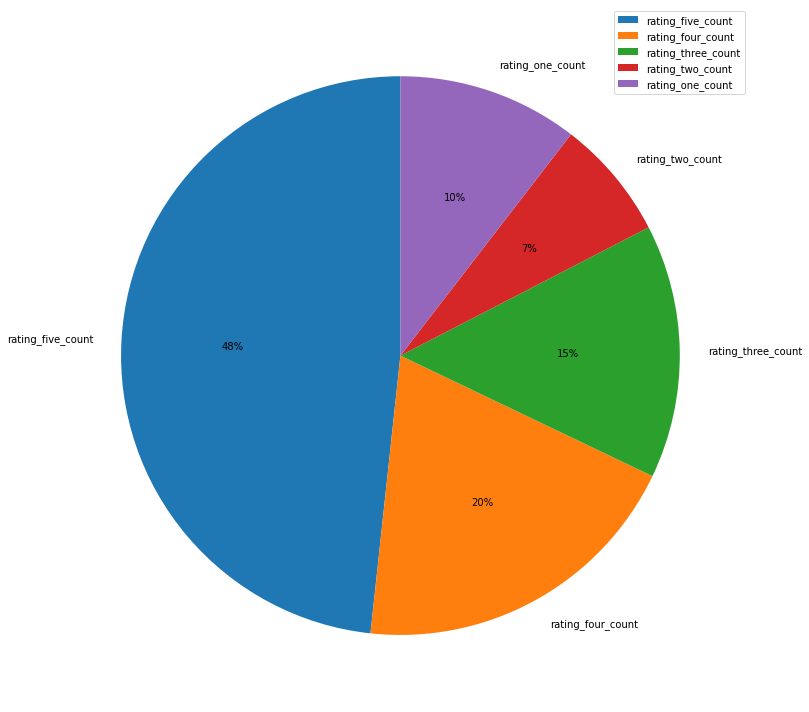

In [42]:
rating_five_count=df_copy["rating_five_count"].sum(),
rating_four_count=df_copy["rating_four_count"].sum(),
rating_three_count=df_copy["rating_three_count"].sum(),
rating_two_count=df_copy["rating_two_count"].sum(),
rating_one_count=df_copy["rating_one_count"].sum()

all = df_copy["rating_five_count"]+df_copy["rating_four_count"]+df_copy["rating_three_count"]+df_copy["rating_two_count"]+df_copy["rating_one_count"]

SUM = all.sum()
precent= 100

q=rating_five_count/SUM*100,rating_four_count*precent/SUM

rating_five_count=rating_five_count*100/SUM
rating_four_count=rating_four_count*100/SUM
rating_three_count=rating_three_count*100/SUM
rating_two_count=rating_two_count*100/SUM
rating_one_count=rating_one_count*100/SUM



data=[rating_five_count[0]*100,rating_four_count[0]*100,rating_three_count[0]*100,rating_two_count[0]*100,rating_one_count]
lable = ["rating_five_count","rating_four_count","rating_three_count","rating_two_count","rating_one_count"]

plt.figure(figsize=(20,10))
plt.pie(data,labels=lable,autopct='%.0f%%',startangle=90)
plt.legend()
plt.tight_layout()
plt.show()


According to the pie chart you can see lot of users gave five stars for startups. 

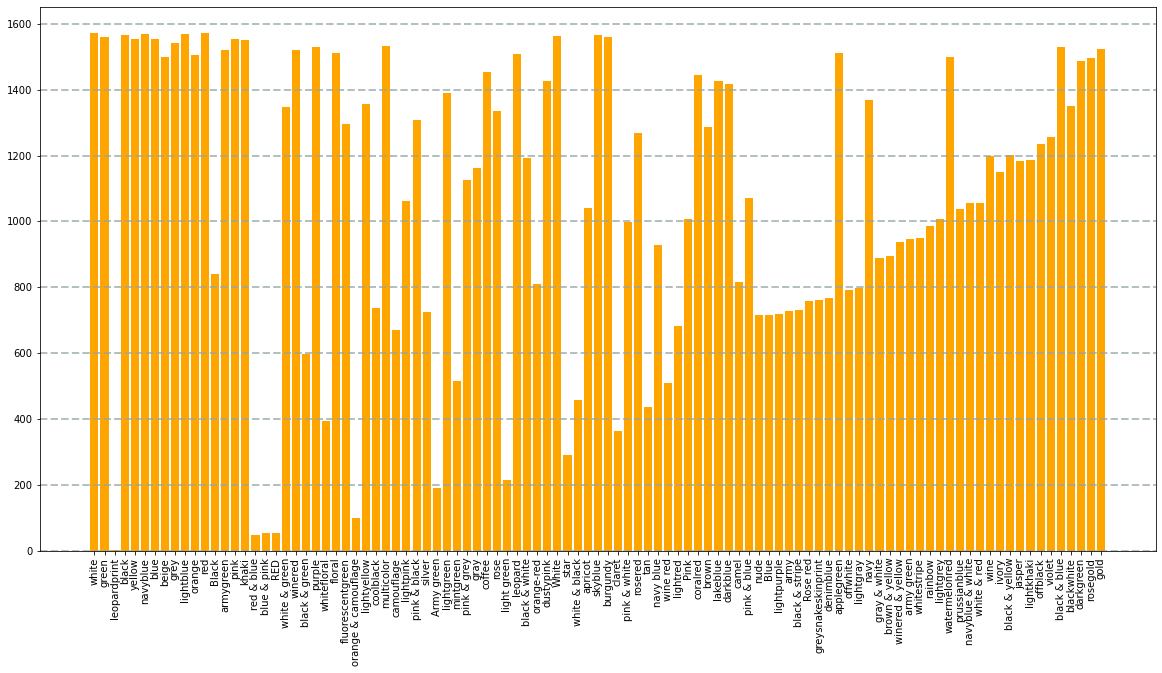

In [36]:
plt.figure(figsize=(20,10))
plt.bar(x = df["product_color"],height =df.index, color='orange')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

From this graph we can see what colours are the most popular  and least popular

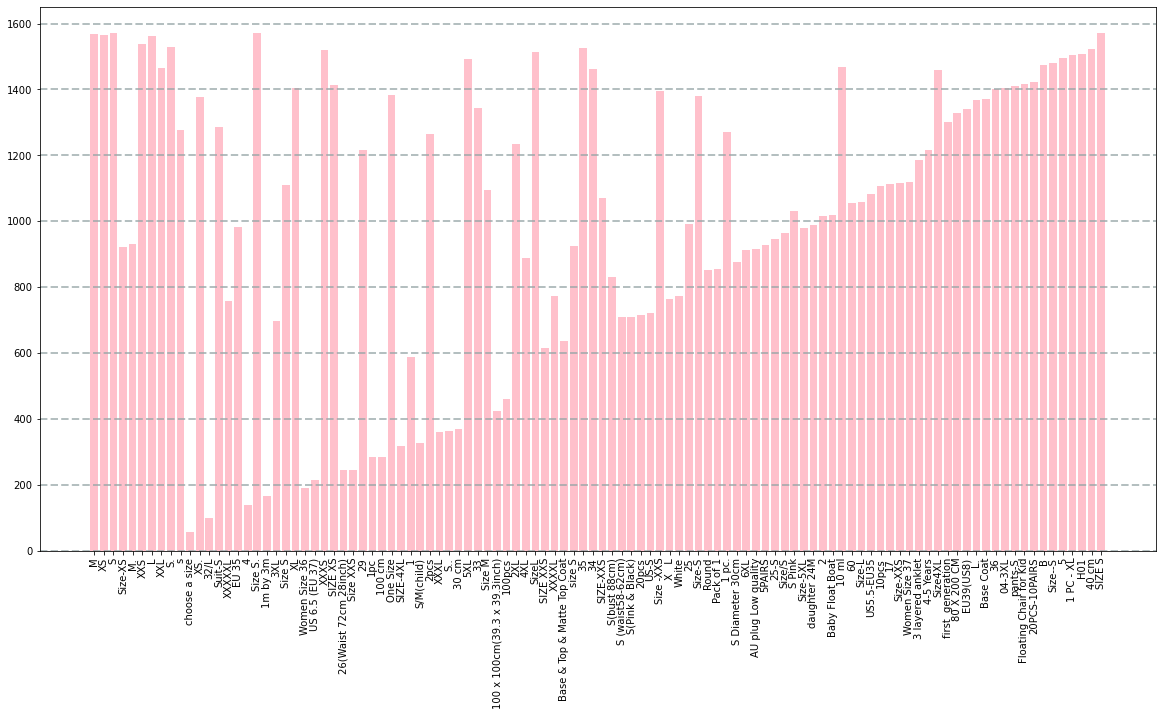

In [40]:
plt.figure(figsize=(20,10))
plt.bar(x=df["product_variation_size_id"],height=df.index , color='pink' )
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

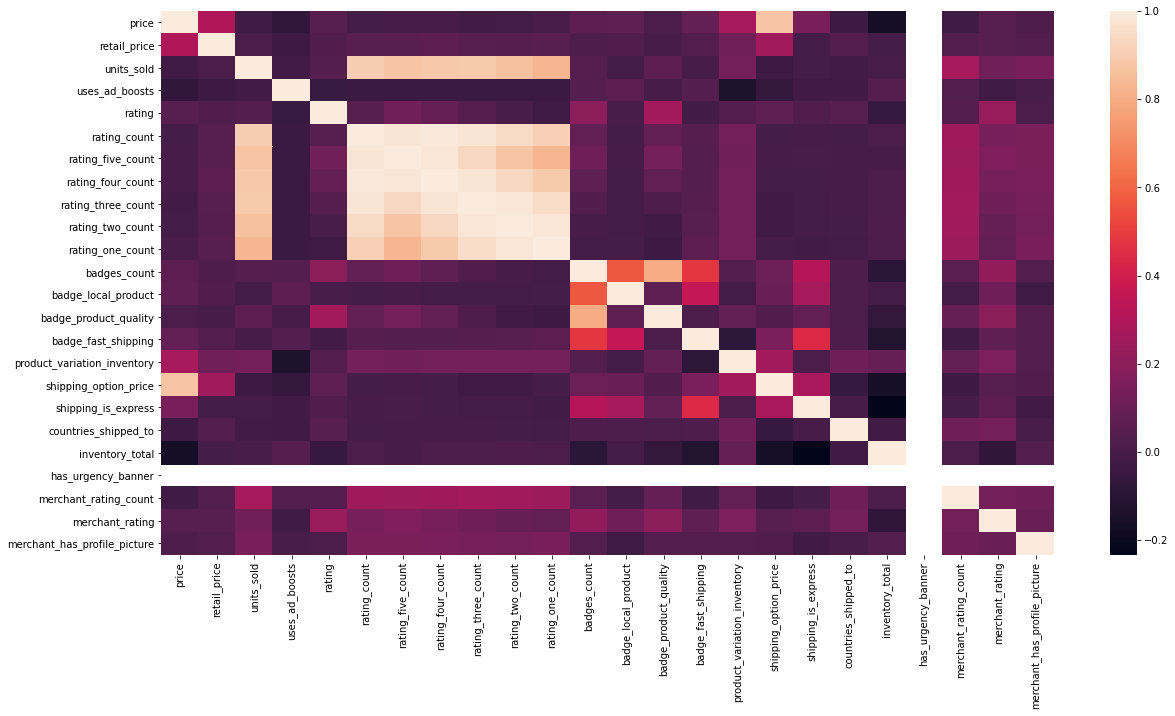

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(df_copy.corr())